<a href="https://colab.research.google.com/github/flavian-koima/Machine-Learning/blob/main/simple_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>CITS5508 Lab sheet 1: Implementing a simple learning model</center>

This is an example notebook to support you in implementing the simple learning model discussed in the lectures.

We have provided some ideas and functions to help you. Use the slide content and your thinking to create the several necessary steps. Your tasks are:

- Generate a linearly separable dataset (you can use the function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html))
- Plot the dataset using the provided code below.
- Use the dataset to apply the simple model on it.
- Show that it converges for this linearly separable dataset by plotting the decision boundary for the final values of the weights and the bias.
- (Optional) Include in the previous plot the decision boundaries for some intermediate steps of the algorithm (that is, non-final values of the weights and bias) to show the algorithm is converging.

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# to display plots in Jupyter notebook
%matplotlib inline

#We will do some 3D plotting
from mpl_toolkits.mplot3d import Axes3D

### Functions and Classes

We usually let the functions and classes defined in the upper part of the code to facilitate code reading and execution.

Defining the *Simple_Model* class is one way to implement the model, but several ways exist. You can choose to follow this code or create your own.

In [13]:
#We are defining the class of our model
class Simple_Model:
    def __init__(self, num_features, num_iterations=1000):
        self.num_iterations = num_iterations
        # Initialize weights with zeros; one extra for the bias
        self.weights = np.zeros(num_features + 1)  # +1 for the bias weight

    def apply_threshold(self, x):
        # apply the decision rule here
        return 1 if x >= 0 else -1


    def predict(self, x):
        # the predict function add the bias term, do the weighted sum and call the decision rule (apply_threshold)
        # Add the bias term
        x_with_bias = np.insert(x, 0, 1)

        # compute weighted_sum
        weighted_sum = np.dot(self.weights, x_with_bias)

        # apply decision rule
        return self.apply_threshold(weighted_sum)

    def train(self, X, y):
        # Add bias term to X (insert a column of ones at the start)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]

        for _ in range(self.num_iterations):
            # Randomly pick an index from the dataset
            sample_id = np.random.choice(len(y))

            # Extract the sample (features and label)
            x_sample = X_with_bias[sample_id]
            y_sample = y[sample_id]

            # Make a prediction
            prediction = self.apply_threshold(np.dot(self.weights, x_sample))

            # If misclassified, update weights
            if prediction != y_sample:
                self.weights += y_sample * x_sample  # Perceptron weight update


In [20]:
#This function plot_decision_boundary takes weights, bias, and X and y ranges as input.
#It calculates points along the decision boundary using the formula for a line (w1x1 + w2x2 + b = 0) and then
#plots the decision boundary using Matplotlib. You can call this function with different weight and bias values to
#visualize different decision boundaries.


def plot_decision_boundary(weights, bias, X, y):
    plt.figure(figsize=(5, 4))

    # Plot data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    # Generate points along the decision boundary
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 200)  # More points for a smoother line

    # Compute x2 using the decision boundary equation: w1*x1 + w2*x2 + b = 0
    # Solving for x2: x2 = -(bias + w1*x1) / w2
    x2 = -(bias + weights[0] * x1) / weights[1]

    # Plot the decision boundary
    plt.plot(x1, x2, 'k-', label='Decision Boundary')

    plt.title('Linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()



### Creating a synthetic data set with two features

In [6]:
# Generate a linearly separable dataset with two classes and two features
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=1, random_state=42)

#Using label classes as -1 and 1 to work with our current algorithm
y[y==0] = -1

### Plotting the data set in 2D

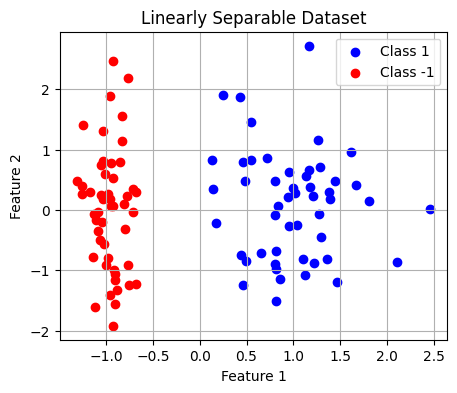

In [8]:
# Plot the dataset
plt.figure(figsize=(5, 4))

#you can plot the examples and have different colors for the different classes using plt.scatter() like the examples in the lecture
# Plot examples for each class using plt.scatter()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

The plot above shows our problem in a two-dimensional space (our feature space is 2D), but our actual problem exists in three dimensions. We have two features describing each example and a third feature that represents the label of the instances. Let's visualize it in 3D. Rotate the picture to see better that all examples of the blue class are positioned at one and all examples of the red class are positioned at zero.

Note: to be able to rotate the 3D visualisation, you will need to install the package *ipympl*. You can it by typing inside your environment:

*conda install -c conda-forge ipyml*

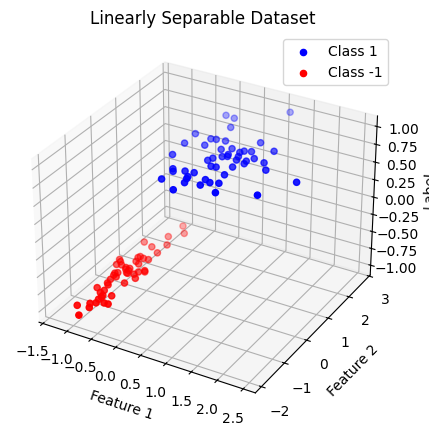

In [9]:
# Plot the dataset in 3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the examples for each class
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], y[y == 1], color='blue', label='Class 1')
ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], y[y == -1], color='red', label='Class -1')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label')
plt.title('Linearly Separable Dataset')
plt.legend()

# Enable interactive mode for rotation
plt.ion()
plt.show()


### Initialising our model and training it

In [21]:


# Create an instance of the model
simple_model = Simple_Model(num_features=2)

# Train the model on the dataset
simple_model.train(X, y)


### Plotting the decision boundary

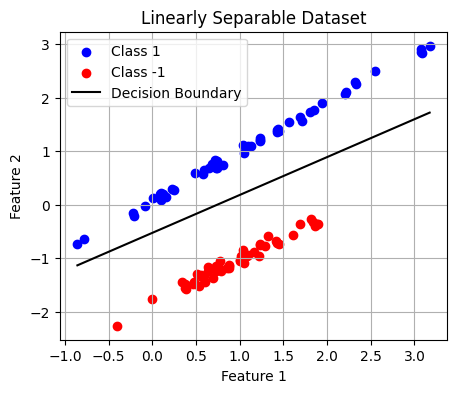

In [22]:
#simple_model.weights will have the weights in norm vector. This is of the form [w0,w1,w2], w0 is bias parameter.
# Extract weights and bias from the model
weights = simple_model.weights[1:]  # This should exclude the bias term, assuming w0 is bias
bias = simple_model.weights[0]  # Assuming w0 is the bias term

plot_decision_boundary(weights, bias, X, y)